In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '6'
import torch
import torch.nn as nn
import numpy as np
from torchvision import models, transforms
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from data import data_reader

Tensor = torch.Tensor
rand_m = np.random.random

In [2]:
MODEL_NAME = 'resnet34'
if not os.path.exists('weights/'):
    !mkdir weights
if not os.path.exists('weights/{}'.format(MODEL_NAME)):
    !mkdir weights/{MODEL_NAME}

In [3]:
from models import model_resnet34

In [4]:
model = model_resnet34(6).to('cuda')

In [5]:
optim = torch.optim.Adam(model.parameters())
loss_func = torch.nn.CrossEntropyLoss()

In [6]:
from data import data_reader
class args:
    bs = 256
    path = 'train2000/'

dr = data_reader(args, 'train2000/train2000.csv')

train_loader, test_loader = dr.get_train_loader()

In [7]:
from utils.train_model import trainer

In [8]:
resnet34_trainer = trainer(model, train_loader=train_loader, save=False, epoch=5,
                           test_loader=test_loader, optim=optim, loss_func=loss_func)

In [9]:
resnet34_trainer.train()

Epoch 0 | Batch # 0 Train Loss 1.85767 
Epoch 0 | Batch # 1 Train Loss 0.51750 
Epoch 0 | Batch # 2 Train Loss 0.68350 
Epoch 0 | Batch # 3 Train Loss 0.91212 
Epoch 0 | Batch # 4 Train Loss 0.36123 
Epoch 0 | Batch # 5 Train Loss 0.37266 
Epoch 0 | Batch # 6 Train Loss 0.23931 
Epoch 0 | Epoch Train Loss 0.70629

Epoch 0 | Epoch Train Acc 74.188%
Epoch 0 | Epoch Val Loss 0.77720
Epoch 0 | Epoch Val Acc 80.750%
Epoch 1 | Batch # 0 Train Loss 0.54509 
Epoch 1 | Batch # 1 Train Loss 0.42131 
Epoch 1 | Batch # 2 Train Loss 0.54093 
Epoch 1 | Batch # 3 Train Loss 0.40500 
Epoch 1 | Batch # 4 Train Loss 0.53405 
Epoch 1 | Batch # 5 Train Loss 0.28101 
Epoch 1 | Batch # 6 Train Loss 0.25107 
Epoch 1 | Epoch Train Loss 0.42550

Epoch 1 | Epoch Train Acc 86.750%
Epoch 1 | Epoch Val Loss 0.43369
Epoch 1 | Epoch Val Acc 86.000%
Epoch 2 | Batch # 0 Train Loss 0.30285 
Epoch 2 | Batch # 1 Train Loss 0.27929 
Epoch 2 | Batch # 2 Train Loss 0.19181 
Epoch 2 | Batch # 3 Train Loss 0.29764 
Epoch 2 | 

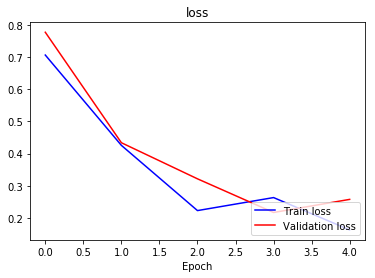

In [10]:
resnet34_trainer.plot_loss()

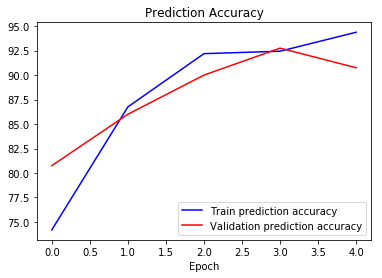

In [11]:
resnet34_trainer.plot_acc()